In [24]:
import polars as pl

In [33]:
deliveries=pl.read_parquet('..\historical_data\cricsheetSource\deliveries.parquet')
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.1,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,None,NaN,NaN,None,None,None,None,None
1,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.2,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,None,NaN,NaN,None,None,None,None,None
2,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.3,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,None,NaN,NaN,None,None,None,None,None
3,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.4,Australia,Sri Lanka,M Klinger,AJ Finch,...,0,NaN,None,NaN,NaN,None,None,None,None,None
4,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.5,Australia,Sri Lanka,M Klinger,AJ Finch,...,0,NaN,None,NaN,NaN,None,None,None,None,None


In [35]:
deliveries['penalty'].unique()

array([None, '5'], dtype=object)

In [3]:
deliveries.write_csv('..\historical_data\cricsheetSource\deliveries.csv')

In [4]:
deliveries=deliveries.fill_null(0).drop(['season','venue','start_date','venue','striker','non_striker','bowler'])
deliveries

match_id,innings,ball,batting_team,bowling_team,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
i64,i64,f64,str,str,i64,i64,i64,str,i64,i64,str,str,str,str,str
1001349,1,0.1,"""Australia""","""Sri Lanka""",0,0,0,null,0,0,null,null,null,null,null
1001349,1,0.2,"""Australia""","""Sri Lanka""",0,0,0,null,0,0,null,null,null,null,null
1001349,1,0.3,"""Australia""","""Sri Lanka""",1,0,0,null,0,0,null,null,null,null,null
1001349,1,0.4,"""Australia""","""Sri Lanka""",2,0,0,null,0,0,null,null,null,null,null
1001349,1,0.5,"""Australia""","""Sri Lanka""",0,0,0,null,0,0,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
995469,2,17.1,"""Australia""","""Sri Lanka""",1,0,0,null,0,0,null,null,null,null,null
995469,2,17.2,"""Australia""","""Sri Lanka""",3,0,0,null,0,0,null,null,null,null,null
995469,2,17.3,"""Australia""","""Sri Lanka""",0,0,0,null,0,0,null,null,null,null,null


In [5]:
deliveries=deliveries.with_columns(deliveries['noballs'].cast(pl.Int16).fill_null(0))
deliveries=deliveries.with_columns(deliveries['penalty'].cast(pl.Int16).fill_null(0))
deliveries=deliveries.with_columns(deliveries['player_dismissed'].is_not_null().cast(pl.Int16))
deliveries=deliveries.with_columns(deliveries['other_player_dismissed'].is_not_null().cast(pl.Int16))

In [6]:
deliveries

match_id,innings,ball,batting_team,bowling_team,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
i64,i64,f64,str,str,i64,i64,i64,i16,i64,i64,i16,str,i16,str,i16
1001349,1,0.1,"""Australia""","""Sri Lanka""",0,0,0,0,0,0,0,null,0,null,0
1001349,1,0.2,"""Australia""","""Sri Lanka""",0,0,0,0,0,0,0,null,0,null,0
1001349,1,0.3,"""Australia""","""Sri Lanka""",1,0,0,0,0,0,0,null,0,null,0
1001349,1,0.4,"""Australia""","""Sri Lanka""",2,0,0,0,0,0,0,null,0,null,0
1001349,1,0.5,"""Australia""","""Sri Lanka""",0,0,0,0,0,0,0,null,0,null,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
995469,2,17.1,"""Australia""","""Sri Lanka""",1,0,0,0,0,0,0,null,0,null,0
995469,2,17.2,"""Australia""","""Sri Lanka""",3,0,0,0,0,0,0,null,0,null,0
995469,2,17.3,"""Australia""","""Sri Lanka""",0,0,0,0,0,0,0,null,0,null,0


In [7]:
deliveries=deliveries.with_columns(deliveries[['runs_off_bat','extras','wides','noballs','byes','legbyes','penalty']].sum_horizontal().alias("runs")).drop(['runs_off_bat','extras','wides','noballs','byes','legbyes','penalty'])
deliveries=deliveries.with_columns(deliveries[['player_dismissed','other_player_dismissed']].sum_horizontal().alias("wickets")).drop(['wicket_type','player_dismissed','other_wicket_type','other_player_dismissed'])
deliveries

match_id,innings,ball,batting_team,bowling_team,runs,wickets
i64,i64,f64,str,str,i64,i16
1001349,1,0.1,"""Australia""","""Sri Lanka""",0,0
1001349,1,0.2,"""Australia""","""Sri Lanka""",0,0
1001349,1,0.3,"""Australia""","""Sri Lanka""",1,0
1001349,1,0.4,"""Australia""","""Sri Lanka""",2,0
1001349,1,0.5,"""Australia""","""Sri Lanka""",0,0
…,…,…,…,…,…,…
995469,2,17.1,"""Australia""","""Sri Lanka""",1,0
995469,2,17.2,"""Australia""","""Sri Lanka""",3,0
995469,2,17.3,"""Australia""","""Sri Lanka""",0,0


In [8]:
deliveries=deliveries.with_columns(pl.col('runs').cum_sum().over(["match_id",'innings']).alias("curr_score")).drop('runs')
deliveries=deliveries.with_columns(pl.col('wickets').cum_sum().over(["match_id",'innings']).alias("curr_wickets")).drop("wickets")

deliveries

match_id,innings,ball,batting_team,bowling_team,curr_score,curr_wickets
i64,i64,f64,str,str,i64,i64
1001349,1,0.1,"""Australia""","""Sri Lanka""",0,0
1001349,1,0.2,"""Australia""","""Sri Lanka""",0,0
1001349,1,0.3,"""Australia""","""Sri Lanka""",1,0
1001349,1,0.4,"""Australia""","""Sri Lanka""",3,0
1001349,1,0.5,"""Australia""","""Sri Lanka""",3,0
…,…,…,…,…,…,…
995469,2,17.1,"""Australia""","""Sri Lanka""",126,6
995469,2,17.2,"""Australia""","""Sri Lanka""",129,6
995469,2,17.3,"""Australia""","""Sri Lanka""",129,6


In [9]:
matches = pl.read_parquet('..\historical_data\cricsheetSource\matches.parquet')
matches

team1,team2,gender,season,date,venue,city,toss_winner,toss_decision,winner,match_id
str,str,str,str,str,str,str,str,str,str,i64
"""Australia""","""Sri Lanka""","""male""","""2016/17""","""2017/02/17""","""Melbourne Cricket Ground""",null,"""Sri Lanka""","""field""","""Sri Lanka""",1001349
"""Australia""","""Sri Lanka""","""male""","""2016/17""","""2017/02/19""","""Simonds Stadium, South Geelong""","""Victoria""","""Sri Lanka""","""field""","""Sri Lanka""",1001351
"""Australia""","""Sri Lanka""","""male""","""2016/17""","""2017/02/22""","""Adelaide Oval""",null,"""Sri Lanka""","""field""","""Australia""",1001353
"""Ireland""","""Hong Kong""","""male""","""2016""","""2016/09/05""","""Bready Cricket Club, Magherama…","""Londonderry""","""Hong Kong""","""bat""","""Hong Kong""",1004729
"""Zimbabwe""","""India""","""male""","""2016""","""2016/06/18""","""Harare Sports Club""",null,"""India""","""field""","""Zimbabwe""",1007655
…,…,…,…,…,…,…,…,…,…,…
"""Pakistan""","""Sri Lanka""","""male""","""2015/16""","""2016/03/04""","""Shere Bangla National Stadium""","""Mirpur""","""Pakistan""","""field""","""Pakistan""",966763
"""Bangladesh""","""India""","""male""","""2015/16""","""2016/03/06""","""Shere Bangla National Stadium""","""Mirpur""","""India""","""field""","""India""",966765
"""United Arab Emirates""","""Netherlands""","""male""","""2015/16""","""2016/02/03""","""ICC Academy""","""Dubai""","""United Arab Emirates""","""field""","""Netherlands""",967081


In [10]:
matches.write_csv('..\historical_data\cricsheetSource\matches.csv')

In [22]:
match_players = pl.read_parquet('..\historical_data\cricsheetSource\match_players.parquet')
match_players

team1_player1,team1_player2,team1_player3,team1_player4,team1_player5,team1_player6,team1_player7,team1_player8,team1_player9,team1_player10,team1_player11,team2_players1,team2_players2,team2_players3,team2_players4,team2_players5,team2_players6,team2_players7,team2_players8,team2_players9,team2_players10,team2_players11,match_id
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64
"""AJ Finch""","""M Klinger""","""TM Head""","""MC Henriques""","""AJ Turner""","""JP Faulkner""","""TD Paine""","""PJ Cummins""","""A Zampa""","""B Stanlake""","""AJ Tye""","""N Dickwella""","""WU Tharanga""","""EMDY Munaweera""","""DAS Gunaratne""","""TAM Siriwardana""","""CK Kapugedera""","""S Prasanna""","""JRMVB Sanjaya""","""SL Malinga""","""KMDN Kulasekara""","""PADLR Sandakan""",1001349
"""M Klinger""","""AJ Finch""","""BR Dunk""","""MC Henriques""","""TM Head""","""AJ Turner""","""JP Faulkner""","""TD Paine""","""PJ Cummins""","""AJ Tye""","""JA Richardson""","""N Dickwella""","""WU Tharanga""","""EMDY Munaweera""","""BKG Mendis""","""DAS Gunaratne""","""TAM Siriwardana""","""CK Kapugedera""","""S Prasanna""","""KMDN Kulasekara""","""SL Malinga""","""JRMVB Sanjaya""",1001351
"""AJ Finch""","""M Klinger""","""BR Dunk""","""TM Head""","""MC Henriques""","""AJ Turner""","""JP Faulkner""","""TD Paine""","""PJ Cummins""","""JA Richardson""","""A Zampa""","""EMDY Munaweera""","""WU Tharanga""","""BKG Mendis""","""DAS Gunaratne""","""TAM Siriwardana""","""CK Kapugedera""","""MD Shanaka""","""S Prasanna""","""KMDN Kulasekara""","""SL Malinga""","""JRMVB Sanjaya""",1001353
"""Nizakat Khan""","""Aizaz Khan""","""Babar Hayat""","""Anshuman Rath""","""Ehsan Khan""","""Tanwir Afzal""","""Shahid Wasif""","""Tanveer Ahmed""","""Ehsan Nawaz""","""Nadeem Ahmed""","""C Carter""","""WTS Porterfield""","""DA Rankin""","""SP Terry""","""JNK Shannon""","""KJ O'Brien""","""GJ Thompson""","""AR McBrine""","""L Tucker""","""J Mulder""","""J Little""","""CA Young""",1004729
"""KL Rahul""","""Mandeep Singh""","""AT Rayudu""","""MK Pandey""","""KM Jadhav""","""MS Dhoni""","""AR Patel""","""R Dhawan""","""JJ Bumrah""","""JD Unadkat""","""YS Chahal""","""CJ Chibhabha""","""H Masakadza""","""R Mutumbami""","""Sikandar Raza""","""MN Waller""","""CT Mutombodzi""","""E Chigumbura""","""AG Cremer""","""N Madziva""","""T Muzarabani""","""DT Tiripano""",1007655
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Sharjeel Khan""","""Mohammad Hafeez""","""Sarfraz Ahmed""","""Umar Akmal""","""Shoaib Malik""","""Iftikhar Ahmed""","""Shahid Afridi""","""Mohammad Amir""","""Wahab Riaz""","""Mohammad Irfan""","""Mohammad Nawaz (3)""","""LD Chandimal""","""TM Dilshan""","""GSNFG Jayasuriya""","""CK Kapugedera""","""MD Shanaka""","""TAM Siriwardana""","""N Dickwella""","""NLTC Perera""","""KMDN Kulasekara""","""HMRKB Herath""","""PVD Chameera""",966763
"""Tamim Iqbal""","""Soumya Sarkar""","""Sabbir Rahman""","""Shakib Al Hasan""","""Mushfiqur Rahim""","""Mashrafe Mortaza""","""Mahmudullah""","""Nasir Hossain""","""Al-Amin Hossain""","""Abu Hider""","""Taskin Ahmed""","""RG Sharma""","""S Dhawan""","""V Kohli""","""MS Dhoni""","""SK Raina""","""Yuvraj Singh""","""HH Pandya""","""RA Jadeja""","""R Ashwin""","""JJ Bumrah""","""A Nehra""",966765
"""MR Swart""","""SJ Myburgh""","""W Barresi""","""PW Borren""","""PM Seelaar""","""MP O'Dowd""","""Mudassar Bukhari""","""MJG Rippon""","""Sikander Zulfiqar""","""PA van Meekeren""","""Ahsan Malik""","""Hafiz Qaleem""","""Mohammad Shahzad (2)""","""Shaiman Anwar""","""SP Patil""","""Mohammad Usman""","""Fahad Tariq""","""Rohan Mustafa""","""Mohammad Naveed""","""Ahmed Raza""","""Farhan Ahmed""","""Qadeer Ahmed""",967081


In [23]:
match_players.write_csv('..\historical_data\cricsheetSource\match_players.csv')

In [11]:
matches=matches.filter(matches['gender']=='male').drop(['team1','team2','gender','season','date','venue','city','toss_winner','toss_decision'])
matches

winner,match_id
str,i64
"""Sri Lanka""",1001349
"""Sri Lanka""",1001351
"""Australia""",1001353
"""Hong Kong""",1004729
"""Zimbabwe""",1007655
…,…
"""Pakistan""",966763
"""India""",966765
"""Netherlands""",967081


In [12]:
data=deliveries.join(matches,on='match_id')
data

match_id,innings,ball,batting_team,bowling_team,curr_score,curr_wickets,winner
i64,i64,f64,str,str,i64,i64,str
1001349,1,0.1,"""Australia""","""Sri Lanka""",0,0,"""Sri Lanka"""
1001349,1,0.2,"""Australia""","""Sri Lanka""",0,0,"""Sri Lanka"""
1001349,1,0.3,"""Australia""","""Sri Lanka""",1,0,"""Sri Lanka"""
1001349,1,0.4,"""Australia""","""Sri Lanka""",3,0,"""Sri Lanka"""
1001349,1,0.5,"""Australia""","""Sri Lanka""",3,0,"""Sri Lanka"""
…,…,…,…,…,…,…,…
995469,2,17.1,"""Australia""","""Sri Lanka""",126,6,"""Australia"""
995469,2,17.2,"""Australia""","""Sri Lanka""",129,6,"""Australia"""
995469,2,17.3,"""Australia""","""Sri Lanka""",129,6,"""Australia"""


In [13]:
innings1= data.filter(data['innings']==1)
innings2= data.filter(data['innings']==2)

In [14]:
innings1=innings1.with_columns(pl.col('curr_score').max().over('match_id').alias('target'))
innings1

match_id,innings,ball,batting_team,bowling_team,curr_score,curr_wickets,winner,target
i64,i64,f64,str,str,i64,i64,str,i64
1001349,1,0.1,"""Australia""","""Sri Lanka""",0,0,"""Sri Lanka""",175
1001349,1,0.2,"""Australia""","""Sri Lanka""",0,0,"""Sri Lanka""",175
1001349,1,0.3,"""Australia""","""Sri Lanka""",1,0,"""Sri Lanka""",175
1001349,1,0.4,"""Australia""","""Sri Lanka""",3,0,"""Sri Lanka""",175
1001349,1,0.5,"""Australia""","""Sri Lanka""",3,0,"""Sri Lanka""",175
…,…,…,…,…,…,…,…,…
995469,1,19.3,"""Sri Lanka""","""Australia""",132,8,"""Australia""",135
995469,1,19.4,"""Sri Lanka""","""Australia""",132,8,"""Australia""",135
995469,1,19.5,"""Sri Lanka""","""Australia""",132,9,"""Australia""",135


In [15]:
a=len(innings1)
b=len(innings2)
a,b,a+b

(279413, 247505, 526918)

In [16]:
comparision_data=innings2.join(innings1,on=['match_id','ball'],how='left').drop(['innings','innings_right','batting_team_right','bowling_team_right'])
comparision_data

match_id,ball,batting_team,bowling_team,curr_score,curr_wickets,winner,curr_score_right,curr_wickets_right,winner_right,target
i64,f64,str,str,i64,i64,str,i64,i64,str,i64
1001349,0.1,"""Sri Lanka""","""Australia""",1,0,"""Sri Lanka""",0,0,"""Sri Lanka""",175
1001349,0.2,"""Sri Lanka""","""Australia""",3,0,"""Sri Lanka""",0,0,"""Sri Lanka""",175
1001349,0.3,"""Sri Lanka""","""Australia""",3,0,"""Sri Lanka""",1,0,"""Sri Lanka""",175
1001349,0.4,"""Sri Lanka""","""Australia""",3,0,"""Sri Lanka""",3,0,"""Sri Lanka""",175
1001349,0.5,"""Sri Lanka""","""Australia""",6,0,"""Sri Lanka""",3,0,"""Sri Lanka""",175
…,…,…,…,…,…,…,…,…,…,…
995469,17.1,"""Australia""","""Sri Lanka""",126,6,"""Australia""",111,7,"""Australia""",135
995469,17.2,"""Australia""","""Sri Lanka""",129,6,"""Australia""",115,7,"""Australia""",135
995469,17.3,"""Australia""","""Sri Lanka""",129,6,"""Australia""",116,7,"""Australia""",135


In [17]:
comparision_data.null_count()

match_id,ball,batting_team,bowling_team,curr_score,curr_wickets,winner,curr_score_right,curr_wickets_right,winner_right,target
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,8185,8185,8185,8185


In [18]:
comparision_data=comparision_data.with_columns([
    (pl.col('batting_team') == pl.col('winner')).alias('win').cast(pl.Int16)
]).drop('winner','batting_team','bowling_team').fill_null(strategy='forward')
comparision_data

match_id,ball,curr_score,curr_wickets,curr_score_right,curr_wickets_right,winner_right,target,win
i64,f64,i64,i64,i64,i64,str,i64,i16
1001349,0.1,1,0,0,0,"""Sri Lanka""",175,1
1001349,0.2,3,0,0,0,"""Sri Lanka""",175,1
1001349,0.3,3,0,1,0,"""Sri Lanka""",175,1
1001349,0.4,3,0,3,0,"""Sri Lanka""",175,1
1001349,0.5,6,0,3,0,"""Sri Lanka""",175,1
…,…,…,…,…,…,…,…,…
995469,17.1,126,6,111,7,"""Australia""",135,1
995469,17.2,129,6,115,7,"""Australia""",135,1
995469,17.3,129,6,116,7,"""Australia""",135,1


In [19]:
comparision_data=comparision_data.drop('match_id_right','ball_right','innings')
comparision_data=comparision_data.with_columns(pl.col('curr_score_right').alias('curr_score_1st_innings')).drop('curr_score_right')

comparision_data=comparision_data.with_columns(pl.col('curr_wickets_right').alias('curr_wickets_1st_innings')).drop('curr_wickets_right')
comparision_data=comparision_data[['match_id','ball','curr_score','curr_wickets','curr_score_1st_innings','curr_wickets_1st_innings','target','win']]
comparision_data

match_id,ball,curr_score,curr_wickets,curr_score_1st_innings,curr_wickets_1st_innings,target,win
i64,f64,i64,i64,i64,i64,i64,i16
1001349,0.1,1,0,0,0,175,1
1001349,0.2,3,0,0,0,175,1
1001349,0.3,3,0,1,0,175,1
1001349,0.4,3,0,3,0,175,1
1001349,0.5,6,0,3,0,175,1
…,…,…,…,…,…,…,…
995469,17.1,126,6,111,7,135,1
995469,17.2,129,6,115,7,135,1
995469,17.3,129,6,116,7,135,1


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(comparision_data.drop(['match_id','win']),comparision_data['win'],test_size=0.3,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [121]:
X_train[:,0].shape,logit_y.shape

((173302,), (173302,))

In [124]:
lr.coef_

array([[-0.23167686,  0.07534662, -0.65964975, -0.02469518,  0.11616078,
        -0.04589044]])

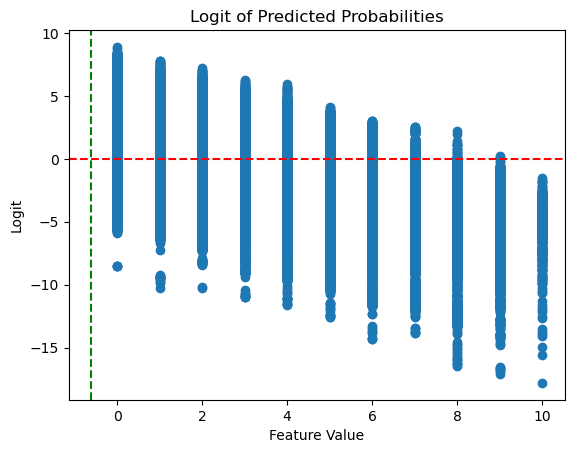

In [140]:
y_proba = lr.predict_proba(X_train)[:, 1]  # Assuming binary classification, get probability for class 1
logit_y = np.log(y_proba / (1 - y_proba))
import matplotlib.pyplot as plt

# Assuming X_train has a single feature for simplicity
plt.scatter(X_train[:,2], logit_y)
plt.xlabel("Feature Value")
plt.ylabel("Logit")
plt.title("Logit of Predicted Probabilities")
plt.axhline(0, color='r', linestyle='--', label='Decision Boundary (logit=0)')
plt.axvline(-0.04589044/.07534662, color='g', linestyle='--', label='Decision Boundary (X)')

plt.show()


In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.816945592611043

In [39]:
confusion_matrix(y_test,y_pred)

array([[32767,  6643],
       [ 6953, 27910]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83     39410
           1       0.81      0.80      0.80     34863

    accuracy                           0.82     74273
   macro avg       0.82      0.82      0.82     74273
weighted avg       0.82      0.82      0.82     74273



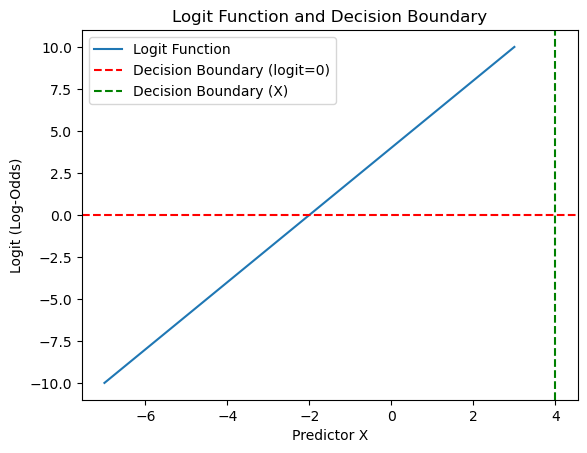

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients
beta_0 = -2
beta_1 = 0.5

# Generate some data points
X = np.linspace(-10, 10, 100)
logits = beta_0 + beta_1 * X

# Plot logit function
plt.plot( logits, X, label='Logit Function')

# Indicate decision boundary
plt.axhline(0, color='r', linestyle='--', label='Decision Boundary (logit=0)')
plt.axvline(-beta_0/beta_1, color='g', linestyle='--', label='Decision Boundary (X)')

plt.xlabel('Predictor X')
plt.ylabel('Logit (Log-Odds)')
plt.title('Logit Function and Decision Boundary')
plt.legend()
plt.show()